This is the notebook collection for Statistics basics. 
---
Remark: I only upload knowledge I may forget

## Table of Contents
1. [Basic Libraries](#basic-libraries)
2. [Covariance and Correlation](#covariance-and-correlation)
3. [Linear Regression](#linear-regression)
4. [Logistic Regression](#logistic-regression)

## Basic Libraries 

[Back to Table of Contents](#table-of-contents)

- Counter

In [1]:
import numpy as np
# roll two six-sided dice for 1000 times
rolls = np.random.randint(1, 7, 1000) + np.random.randint(1, 7, 1000)

from collections import Counter
c=Counter(rolls)
print(c)
print(c.most_common(1)) # find the most common
print(c.most_common(1)[0][0]) # just the value
print(c.most_common(4)) # find the four most common

Counter({7: 154, 8: 144, 6: 142, 9: 117, 10: 102, 5: 99, 4: 98, 11: 52, 3: 44, 12: 30, 2: 18})
[(7, 154)]
7
[(7, 154), (8, 144), (6, 142), (9, 117)]


- Statistics

In [2]:
## Quantiles
import statistics 
quantile = lambda p, data: sorted(data)[int(p * len(data))-1]
nums = [22, 12, 1, 5, 6, 2, 3, 20, 12, 8]
nums.sort()
print(len(nums))
print(nums)
print(statistics.median(nums)) # the median is the 50th percentile, in our case, it should be (6+8)/2 = 7
print(quantile(0.50,nums)) # we truncated, but close

10
[1, 2, 3, 5, 6, 8, 12, 12, 20, 22]
7.0
6


## Covariance and Correlation

[Back to Table of Contents](#table-of-contents)

- Weight-Height example

In [3]:
import pandas as pd
weight_height= pd.read_csv('data/weight-height.csv')
print(weight_height.head(10))

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
5   Male  67.253016  152.212156
6   Male  68.785081  183.927889
7   Male  68.348516  167.971110
8   Male  67.018950  175.929440
9   Male  63.456494  156.399676


In [4]:
# Add a new feature but not inplace
weight_height['Female']=weight_height['Gender'].apply(lambda x: 1 if x=="Female" else 0)
print(weight_height)

      Gender     Height      Weight  Female
0       Male  73.847017  241.893563       0
1       Male  68.781904  162.310473       0
2       Male  74.110105  212.740856       0
3       Male  71.730978  220.042470       0
4       Male  69.881796  206.349801       0
...      ...        ...         ...     ...
9995  Female  66.172652  136.777454       1
9996  Female  67.067155  170.867906       1
9997  Female  63.867992  128.475319       1
9998  Female  69.034243  163.852461       1
9999  Female  61.944246  113.649103       1

[10000 rows x 4 columns]


In [5]:
# Useful inspection for numerical data
print(weight_height.describe())

             Height        Weight        Female
count  10000.000000  10000.000000  10000.000000
mean      66.367560    161.440357      0.500000
std        3.847528     32.108439      0.500025
min       54.263133     64.700127      0.000000
25%       63.505620    135.818051      0.000000
50%       66.318070    161.212928      0.500000
75%       69.174262    187.169525      1.000000
max       78.998742    269.989699      1.000000


In [6]:
# Useful inspection for categorical data
print(weight_height['Gender'].value_counts())

Gender
Male      5000
Female    5000
Name: count, dtype: int64


In [7]:
# Correlation matrix
corr=weight_height.corr(numeric_only=True)
print(corr)

          Height    Weight    Female
Height  1.000000  0.924756 -0.691072
Weight  0.924756  1.000000 -0.796723
Female -0.691072 -0.796723  1.000000


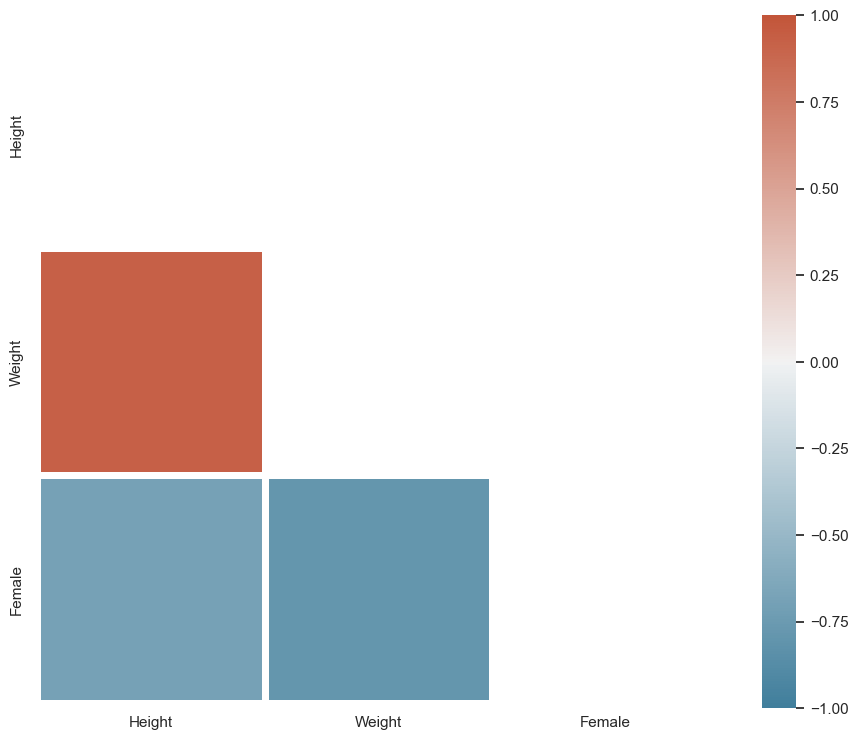

In [8]:
# Visualize the correlation matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
corr=weight_height.corr(numeric_only=True)

sns.set_theme(style="white")    # white, dark, whitegrid, darkgrid, ticks

# Generate a mask for the upper triangle (because of duplicated information)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": 1})
plt.show()

- Alphabet example: Here we generate some normally distributed data for 26 columns that we call A through Z, one column per letter of the alphabet.

<Axes: >

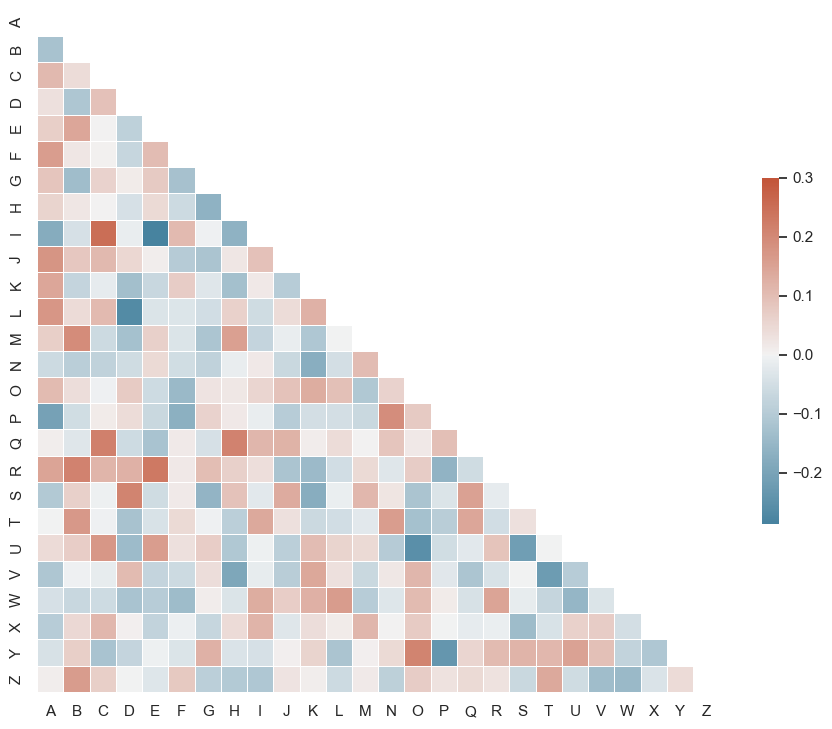

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
rs = np.random.RandomState(42)

# If we increase the size, the sample converges to i.i.d. by the law of large numbers
df = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# print(df.describe())

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Linear Regression

[Back to Table of Contents](#table-of-contents)

The following is the formula for simple linear regression:

$$
y_i=\alpha+\beta x_i+\varepsilon_i
$$


The following is the formula for the loss function, often called the Residual Sum of Squares(RSS):

$$
R S S=\sum_{i=1}^n \hat{\varepsilon}_i^2=\sum_{i=1}^n\left(y_i-\alpha-\beta x_i\right)^2
$$

Here are two important formulas (specific in the general form of normal equations): 

$$\boxed{\hat{\alpha}=\bar{y}-\hat{\beta} \bar{x}}$$

$$\boxed{\hat{\beta}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}=r_{x, y} \frac{s_y}{s_x}}$$

where $r_{x,y}$ is the correlation: 

$$
r_{x, y}=\frac{s_{x, y}}{s_x s_y}
$$

and s_{x, y} is the covariance:

$$s_{x, y}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{n-1}$$

and $s_x$ and $s_y$ are standard deviations: 

$$
s_x=\sqrt{\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}{n-1}}, \quad s_y=\sqrt{\frac{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}{n-1}}
$$

The "r-squared" or "coefficient of determination" is usually the fit-of-goodness metric:

$$
r^2=1-\frac{R S S}{T S S}
$$

where the Residual Sum of Squares(RSS) is shown previously, and the Total Sum of Squares TSS is:

$$
T S S=\sum^n_{i=1}\left(y_i-\bar{y}\right)^2
$$

The r-squared typically ranges from 0 to 1, although it could potentially be less than 0 in the case of a very bad model (e.g., we forgot to add the intercept term $\alpha$). If it is 0, the model is constantly predicitng the mean of all observations and fits poorly; If it is 1, the model interpolates the data and fits perfectly. It is sometimes referred to as the "proportion of the variance accounted by the model."



- Naive example

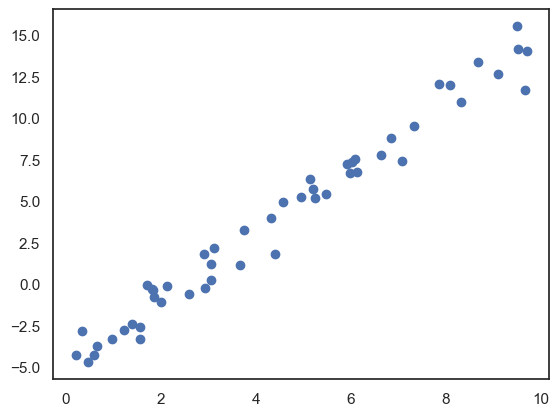

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
# generate 50 random data points in [0, 10) with a slope of 2 and an intercept of -5 and add noise
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)   # \alpha = 2, \beta = -5

plt.scatter(x, y)

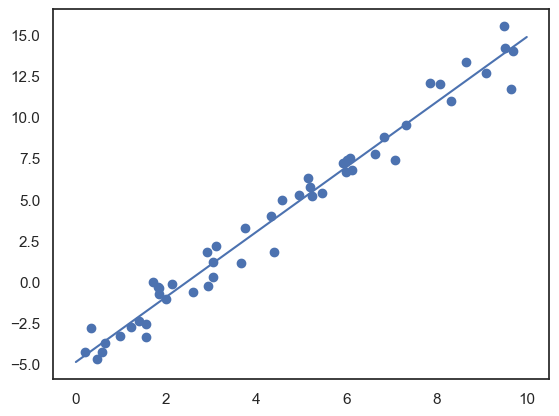

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression(fit_intercept=True)

# x[:, np.newaxis] transforms the predictors to a column vector in numpy
model.fit(x[:, np.newaxis], y)

# generate a vector of 1000 evenly-spaced numbers between 0 and 10
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [12]:
print(model.coef_)  # \hat{\alpha}=1.98 ～ \alpha=2
print(model.intercept_) # \hat{\beta}=-4.9 ～ \beta=-5

[1.9776566]
-4.903310725531115


- Tips Data example

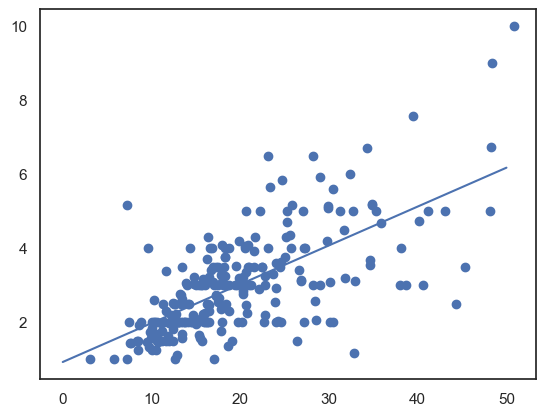

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
import numpy as np


tips=pd.read_csv("data/tips.csv")
y=tips['tip']
x=np.array(tips['total_bill'])
# x[:, np.newaxis] transforms the predictors to a column vector in numpy
model.fit(x[:, np.newaxis],y)

# generate a vector of 1000 evenly-spaced numbers between 0 and 10
xfit = np.linspace(0, 50, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [14]:
print(model.coef_)
print(model.intercept_)

[0.10502452]
0.920269613554674


In [15]:
## Using Statsmodels instead of Scikit-learn
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    import statsmodels.api as sm

# you need to add a constant in Statsmodels if you want an intercept
x1 = sm.add_constant(x, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(y,x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           6.69e-34
Time:                        21:54:03   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1050      0.007     14.260      0.0

## Logistic Regression

[Back to Table of Contents](#table-of-contents)

The idea of logistic regression is based on transforming a probability $p$ to a new value that can range from $-\infty$ to $+\infty$. We use the following formula to do that:

$$
\ln \left(\frac{p}{1-p}\right)
$$

where $\left(\frac{p}{1-p}\right)$ is called the odds of an event with probability $p$. 

Logistic regression is simply linear regression after the target variable, which initially ranges from 0 to 1 (like a probability or a percentage) is transformed to log odds. So we simply have (if we have $m$ predictors):

$$
\ln \frac{p}{1-p}=\beta_0+\beta_1 x_1+\beta_2 x_2+\cdots+\beta_m x_m
$$

which in other words, 

$$
p=\frac{1}{1+e^{-\left(\beta_0+\beta_1 x_1+\beta_2 x_2+\cdots+\beta_m x_m\right)}}
$$

where the RHS is called the logistic function, a special example of sigmoid function.

Note in the case of a single predictor, $\beta_0$ becomes $\alpha$ and $\beta_1$ simply $\beta$.

Unlike simple linear regression, there is no closed form for estimating the parameters. The parameters (the betas) are usually estimated using a technique called [maximum likelihood estimation](http://online.stat.psu.edu/stat415/lesson/1/1.2) (MLE).

- Loan Default example ([website](https://www.statology.org/plot-logistic-regression-in-python/))

In [16]:
import pandas as pd 
data = pd.read_csv("data/default.csv")
print(data.head(5),'\n')
print(data['default'].value_counts())

   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879 

default
0    9667
1     333
Name: count, dtype: int64


<Axes: xlabel='balance', ylabel='default'>

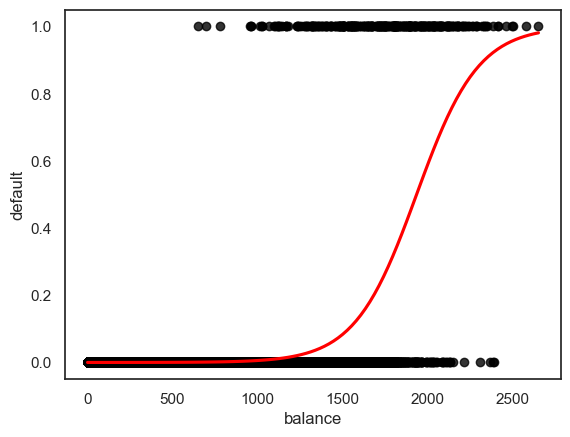

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# define the predictor variable/feature and the response variable/target
x = data['balance']
y = data['default']

# plot logistic regression curve
# the actual data is in black and the fit line is in red
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

By default, the threshold for logistic regression is 0.5. 

It seems not a good fit here but in fact its accuracy is high, this is because we have too little default cases compared to non-default cases. But there is a natural problem arised from this situation which will be talked later.

In [18]:
import statsmodels.api as sm
X = sm.add_constant(data['balance'], prepend=False)
y=data['default']
log_reg=sm.Logit(y,X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.4534
Time:                        21:54:03   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0055      0.000     24.952      0.000       0.005       0.006
const        -10.6513      0

We can see that the coefficient on "balance" is positive. This means that as the balance goes up, so does the probability of default. 

If we exponentiate the coefficients, we see that every additional dollar of balance increases the odds of default by a factor of 1.005514, although that is just the point estimate.

In [19]:
import numpy as np
np.exp(log_reg.params)

balance    1.005514
const      0.000024
dtype: float64

We then fit the model with scikit-learn to get the predicted values and look at the cases where the predicted value is different than the true value.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z[z['True']!=z['Prediction']]

,True,Prediction
6,1,0
34,0,1
82,0,1
99,1,0
114,1,0
...,...,...
2337,1,0
2355,1,0
2393,1,0
2419,1,0


In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[2414    8]
 [  55   23]]


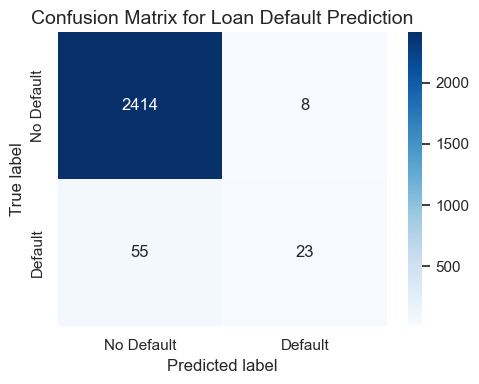

In [23]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Create labels and values for the confusion matrix
labels = ['No Default', 'Default']
tn, fp = cm[0]
fn, tp = cm[1]

# Create a figure with custom size
plt.figure(figsize=(5, 4))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add percentages inside boxes
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Loan Default Prediction', fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9748
Precision: 0.7419354838709677
Recall: 0.2948717948717949


Recall is also named as sensitivity, hit rate, or true positive rate (TPR). 

In [25]:
print(z[z['Prediction']==1]['True'].value_counts(),'\n')
print(z[z['Prediction']==0]['True'].value_counts())

True
1    23
0     8
Name: count, dtype: int64 

True
0    2414
1      55
Name: count, dtype: int64


Important Remarks: 

- We can see clearly from the confusion map and the scores, that although overall speaking, the model predicts with a high accuracy, but actually since the default data only counts for 3 percent of the whole data set, the naive model of only predicting non-default can also reach an accuracy of 97 percent. Therefore, due to this intrinsic biased-ness from the data set, logistic regression does not perfrom really better than naive model. This is also captured from the fact that we have a rather low precision of 74.19% which reflects that among all of our 31 default predictions, only 23 of them are correct. Moreover, we have an especially low recall of 29.48%, in the sense that among all (23+55=78) default data, the model only captures 23 of them. Therefore, the logistic regression does not actually predict well among the 3 percent default cases. 

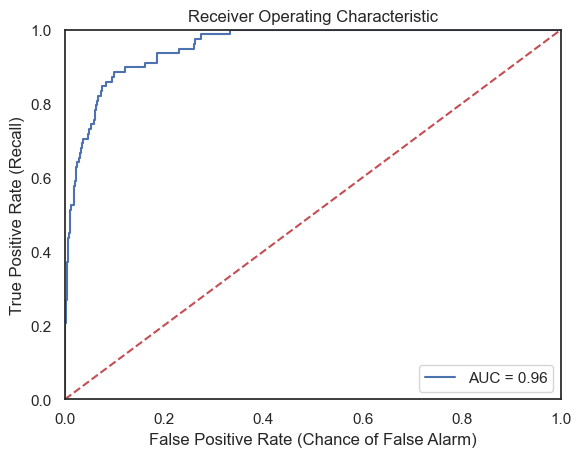

In [26]:
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')  # random prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate (Chance of False Alarm)')
plt.show()

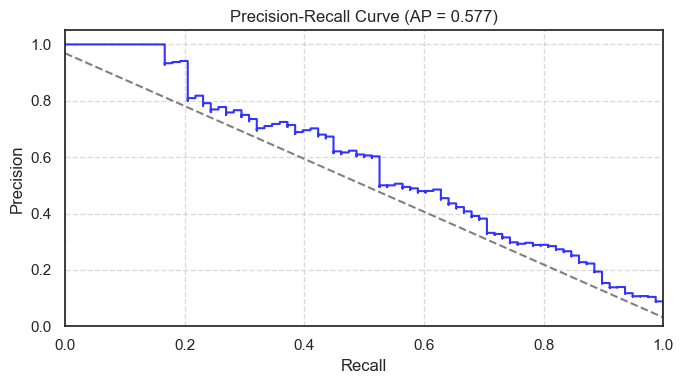

Average Precision Score: 0.5771
Default rate in test set: 0.0312


In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall values at different thresholds

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, preds)

# Calculate average precision
average_precision = average_precision_score(y_test, preds)

# Create the precision-recall curve
plt.figure(figsize=(7, 4))
plt.step(recall, precision, color='blue', alpha=0.8, where='post')

# Add deterministic baseline because of 3% default rate
plt.plot([0, 1], [1-y_test.mean(), y_test.mean()], linestyle='--', color='gray')

# Labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = {:.3f})'.format(average_precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print some key metrics
print(f"Average Precision Score: {average_precision:.4f}")
print(f"Default rate in test set: {y_test.mean():.4f}")

$$Positive Predictive Value(\text{PPV, Precision})=TP/(TP+FP)$$
$$TPR(\text{Recall}) = TP/(TP+FN)$$
$$FPR(\text{False alarm rate})=FP/(FP+TN)$$

Important Remarks: Analysis

- The Receiver Operating Characteristic (ROC) Curve was originally developed in the context of radar in World War II. Allied radar recievers were detecting Japanese aircraft. In our logistic regression case, recall that by by default have a probability threshold of 0.5 for classification. As we decrease the threshold, we will have beterr recall but lower precision and lower FPR, as we increase the threshold, we will have better precision and better FPR, but we will have lower recall. Therefore, the trade-off between Precision and Recall, and the trade-off between FPR and Recall, determines two metrics for model performace. The Precision/Recall Curve corresponds to the former one. The ROC curve corresponds to the latter one. Overall speaking, we want our model to predict better than random guessing shown as the red dotted line in ROC, and better than deterministic as shown by the grey dotted line in P/R curve. We see that logistic regression performs well in the ROC sense as AUC is large, while it performs poor in the P/R sense that it only outperforms a little bit than any deterministic methods. 

Important Remarks: Comparison between ROC and Precision/Recall

- The ROC curve is particularly effective when the dataset is balanced and when false positives and false negatives are of equal concern.

- Precision and Recall are more appropriate for imbalanced classes, where metrics like accuracy may be misleading. Precision and Recall are also valuable when you are more concerned about one class over the other, allowing you to prioritize minimizing false positives or false negatives depending on the specific use case.

In our case, Percision/Recall is a better metric since our dataset is very biased/unbalanced, and it is sensitively captured by P/R curve. 
